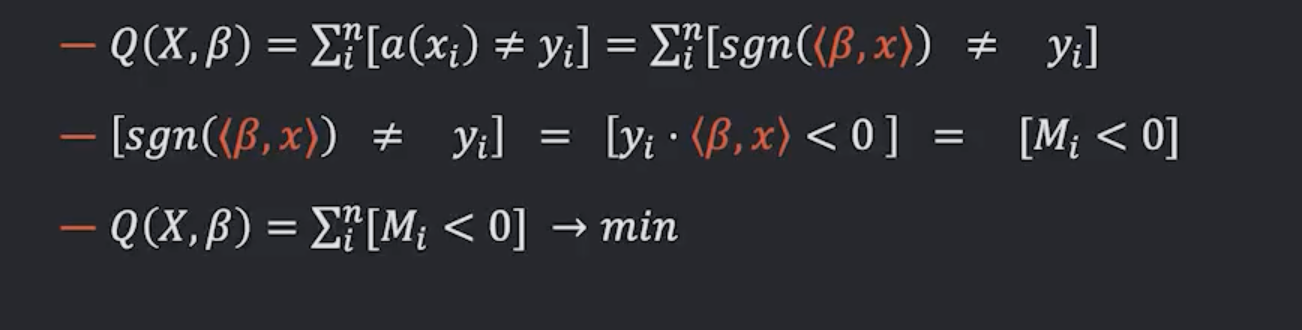

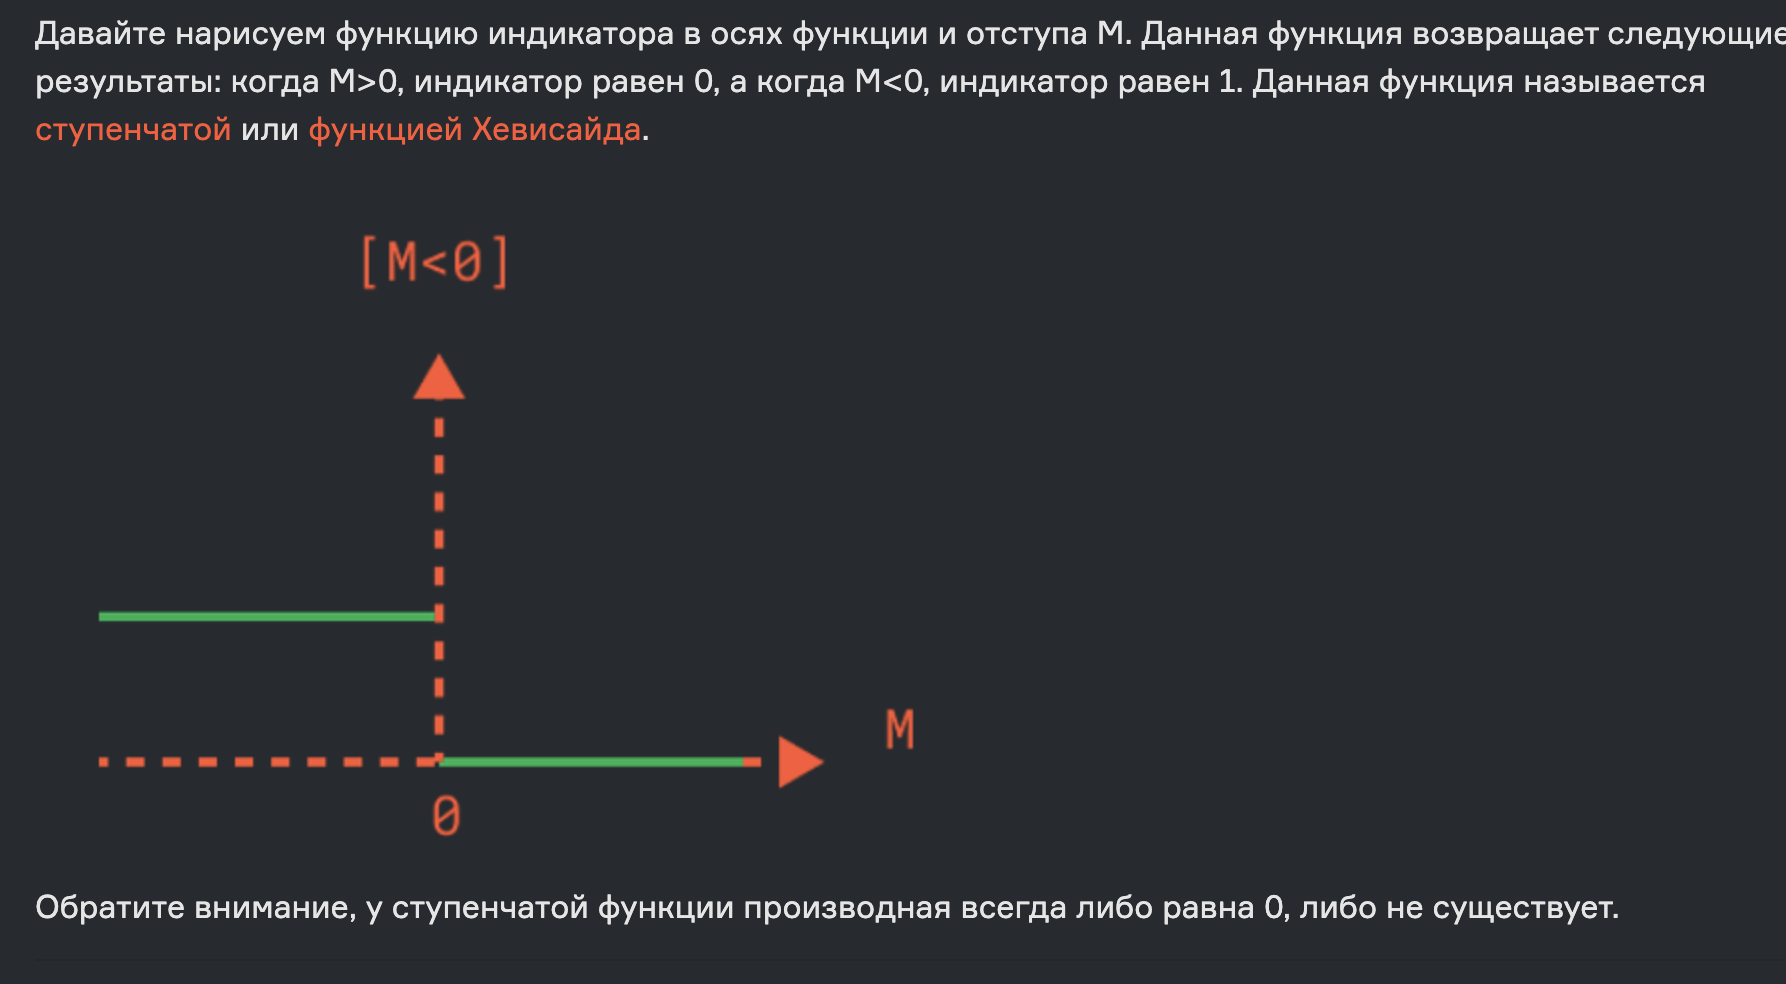

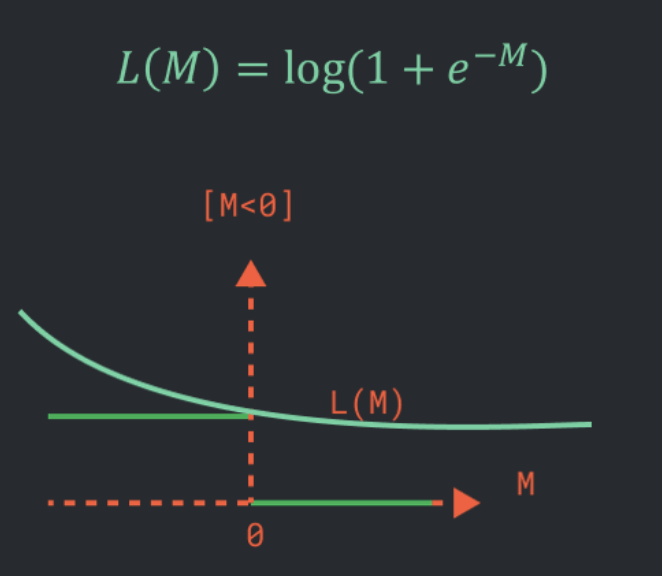

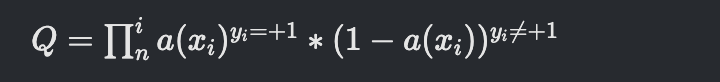
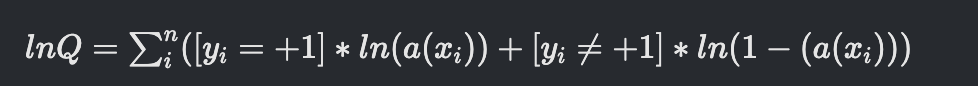
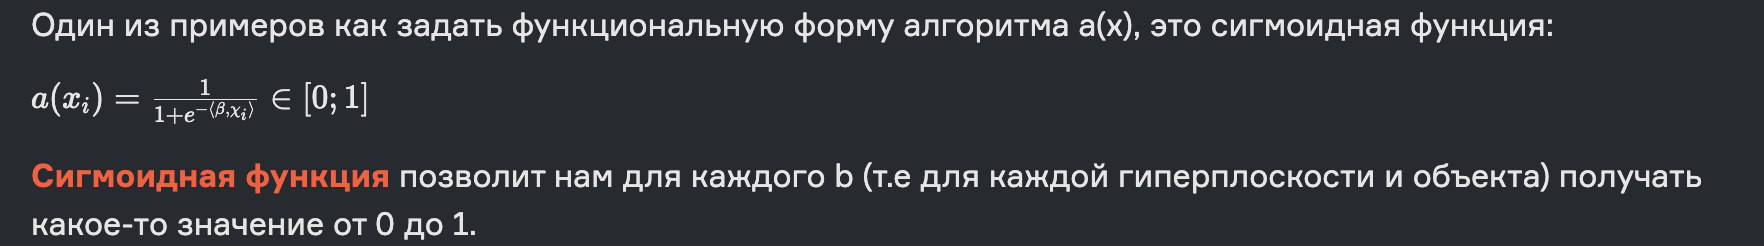


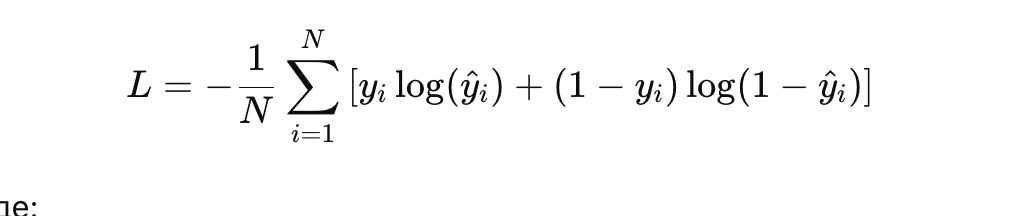

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([('scaler', StandardScaler()),
                 ('LR', LogisticRegression(penalty='none'))])

pipe.fit(X_train, Y_train)
pipe.score(X_test, Y_test) # accurancy

In [ ]:
pipe.classes_ # classes [1 0]
pipe.predict_proba(X_test) # predict probability [0.8 0.2]
pipe.decision_function(X_test) # distance from separating line [-2.05]

## Precision and Recall

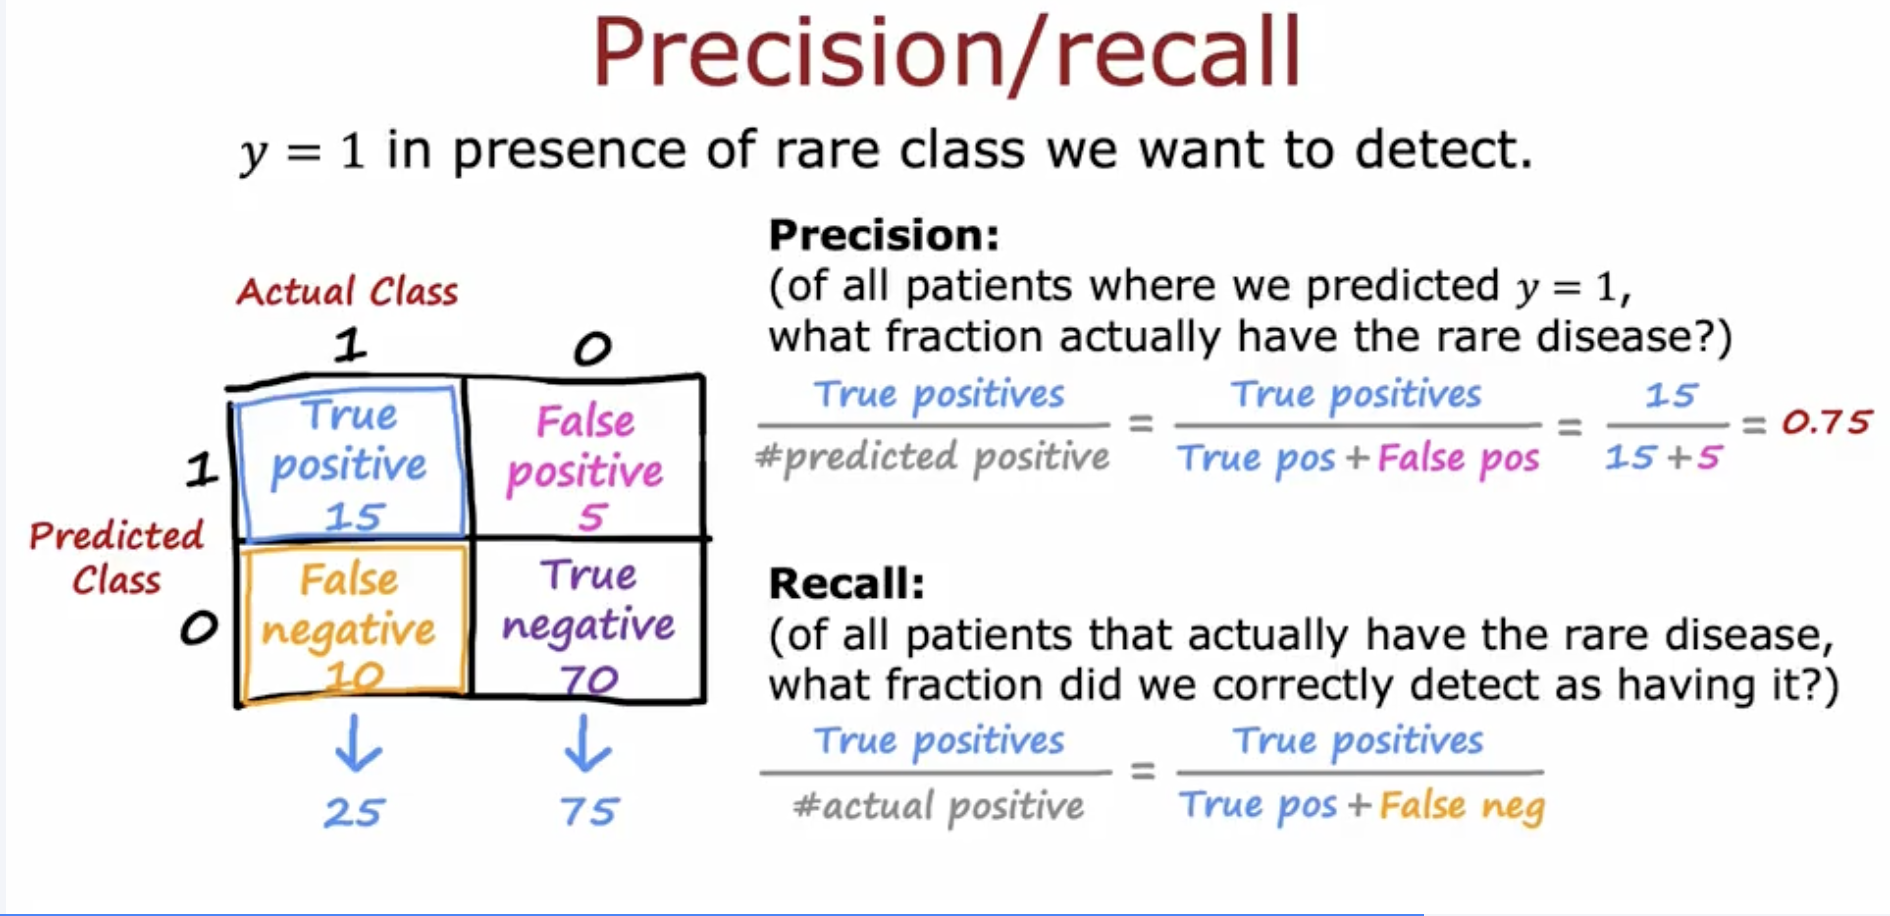

## F1

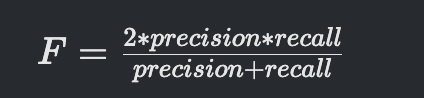

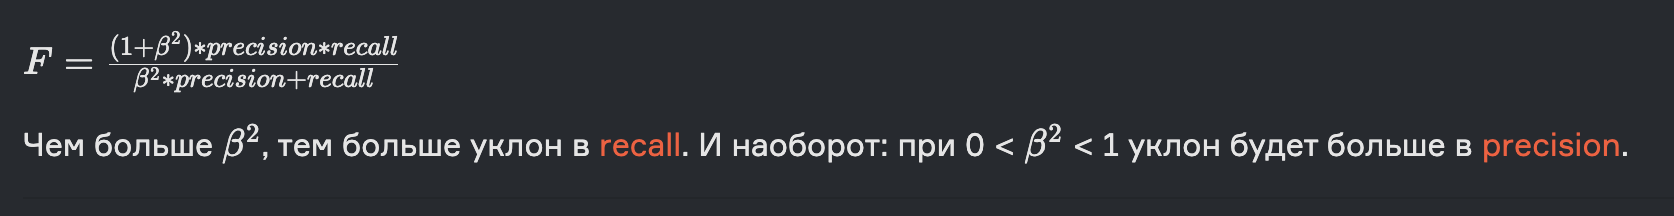

In [ ]:
# матрица ошибок
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, pipe.predict(X_test)).ravel()

print(f'True Negative errors: {tn}')
print(f'False Positive errors: {fp}')
print(f'False Negative errors: {fn}')
print(f'True Positive errors: {tp}')

In [ ]:
# визуализация матрицы
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, pipe.predict(X_test), labels=pipe.classes_)

cmp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(16,10))
cmp.plot(ax=ax)

plt.show()

In [ ]:
# расчет метрик
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

accuracy_score(Y_test, pipe.predict(X_test))

precision_score(Y_test, pipe.predict(X_test))

recall_score(Y_test, pipe.predict(X_test))

f1_score(Y_test, pipe.predict(X_test))

In [ ]:
# выбор threshold - порога вероятности
from sklearn.metrics import precision_recall_curve

precision_recall_curve(Y_test, pipe.predict_proba(X_test)[:, 1])

In [ ]:
### Найдем threshold, максимизирующий F-меру
precision, recall, thresholds = precision_recall_curve(Y_test, pipe.predict_proba(X_test)[:, 1])

f1_scores = 2 * precision * recall / (precision + recall)

print("Best F-score: ", np.max(f1_scores))
print("Threshold for Best F-score: ", thresholds[np.argmax(f1_scores)])

## ROC-кривая

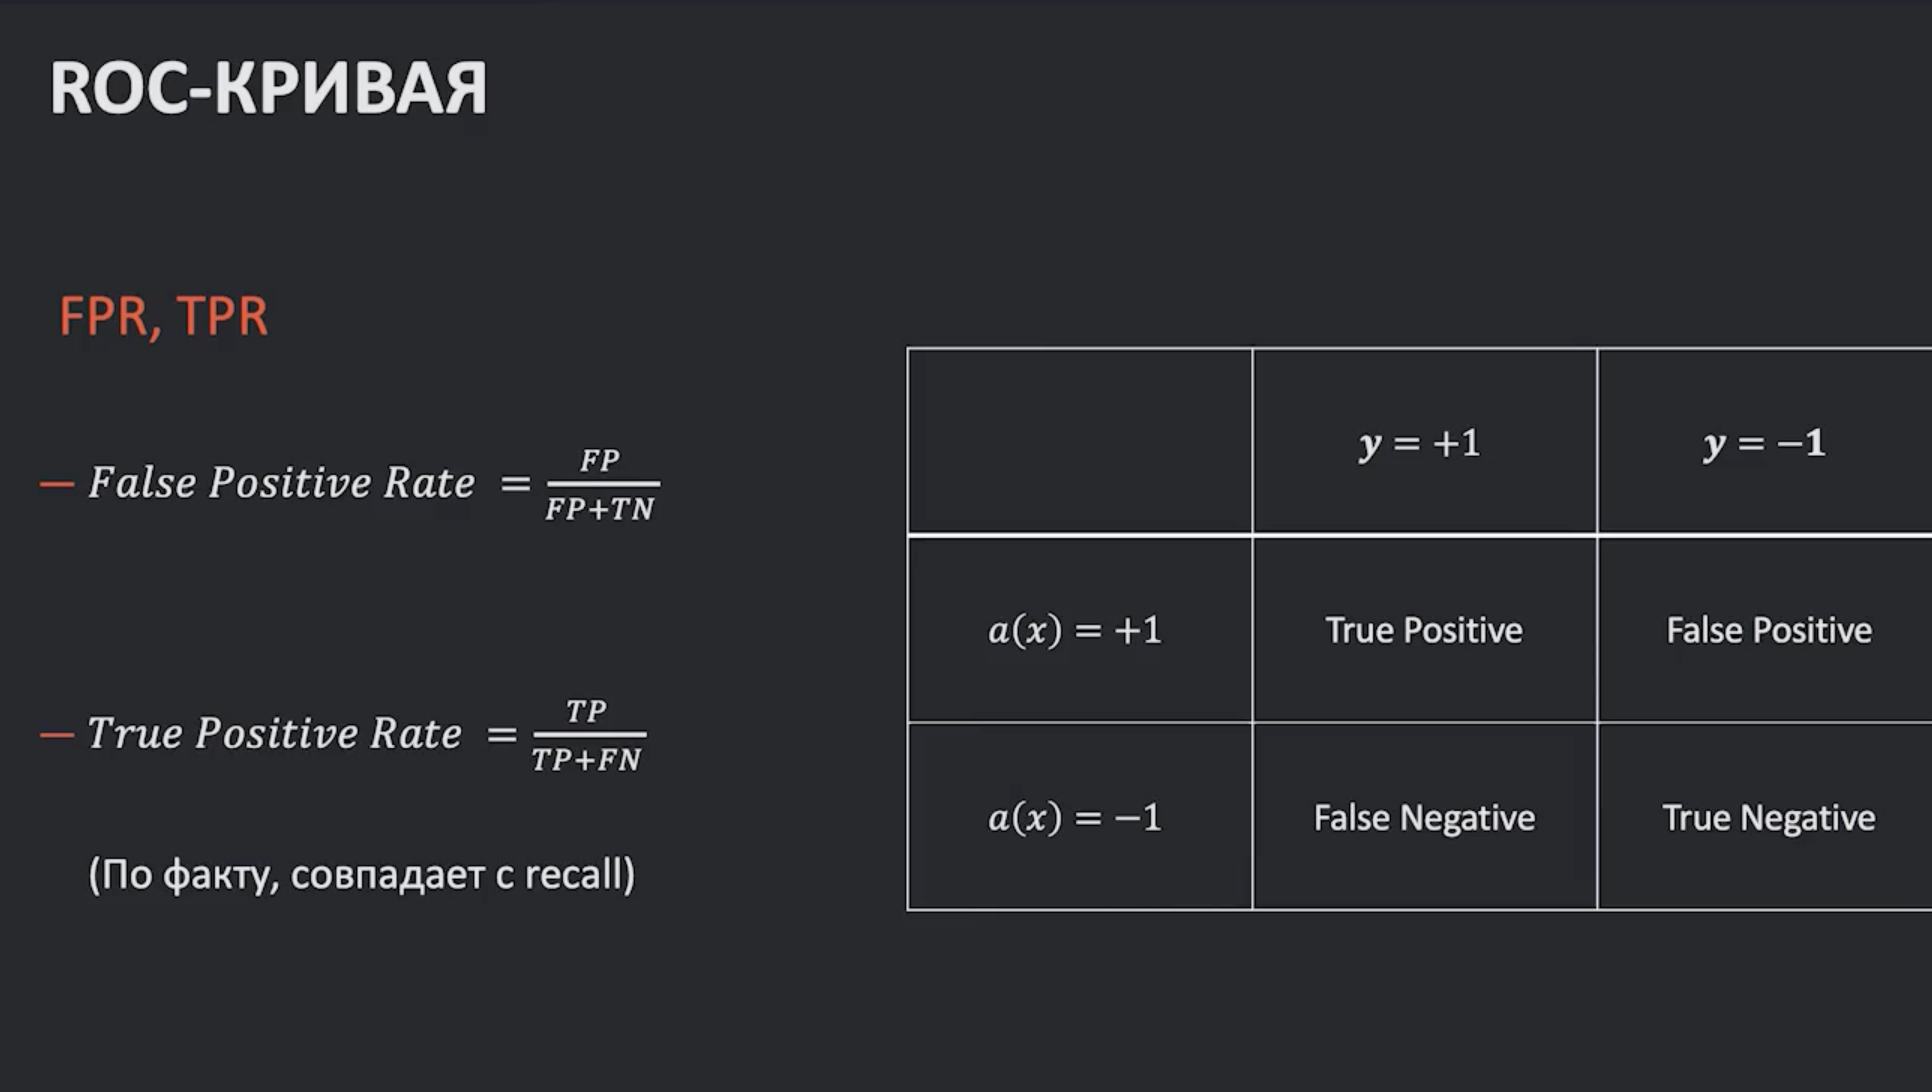


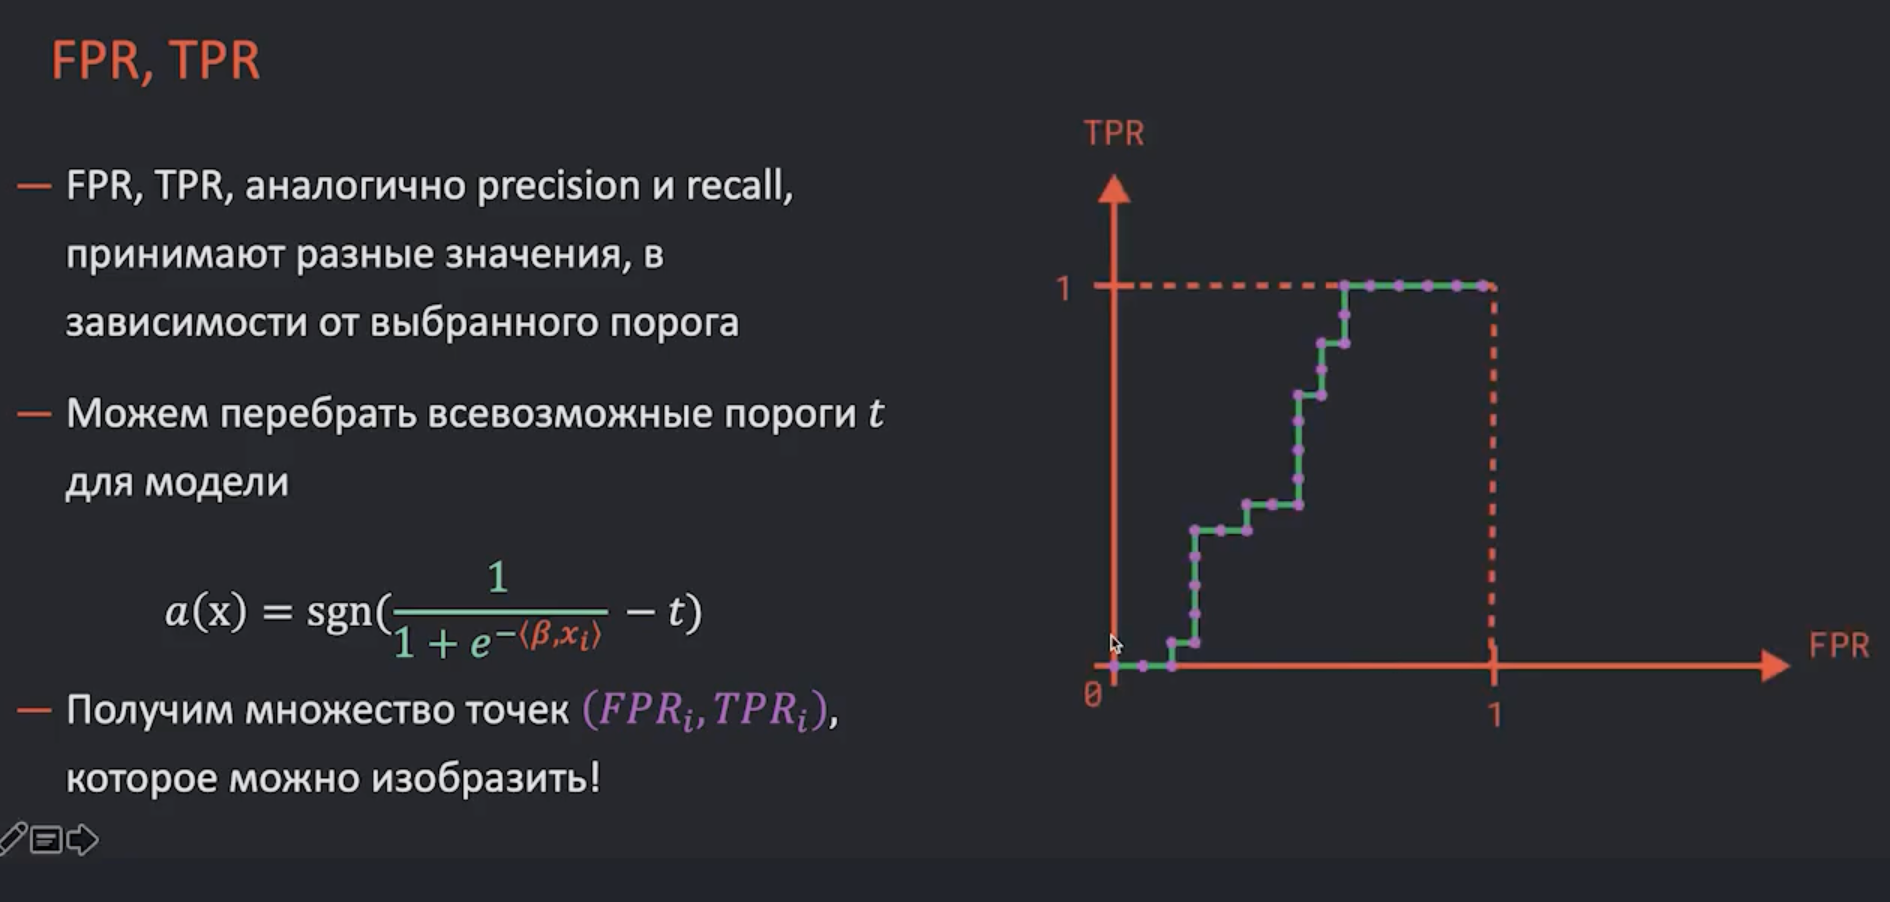

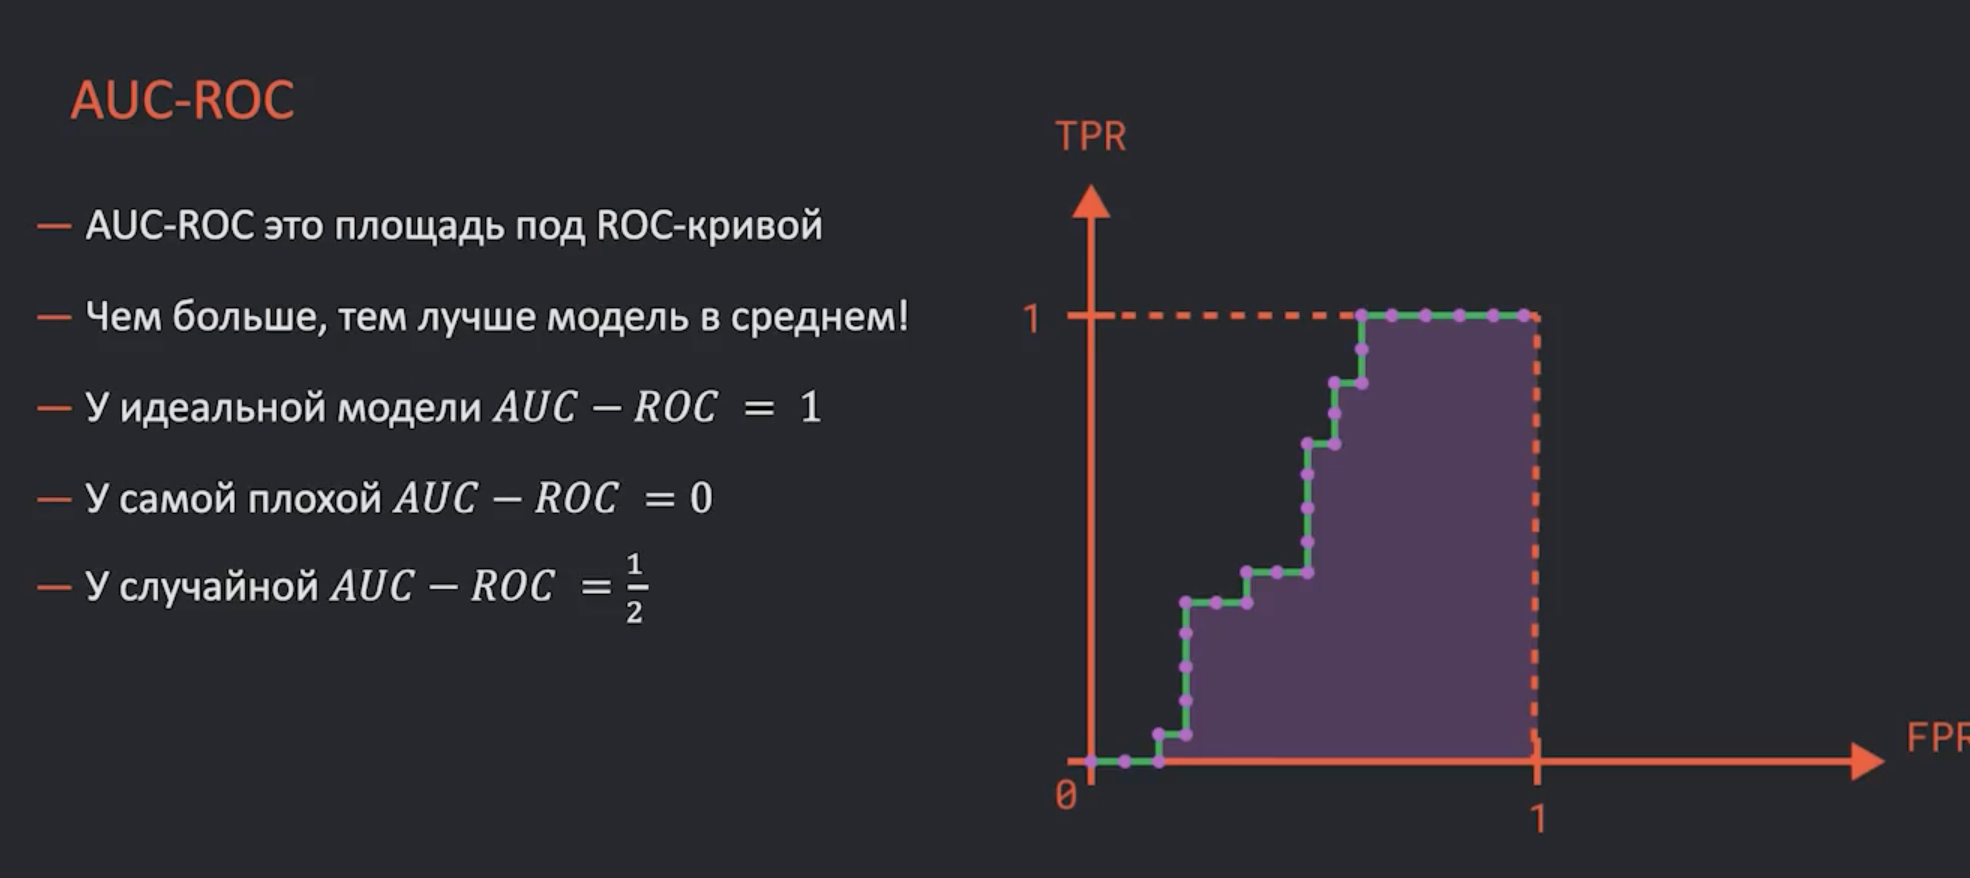
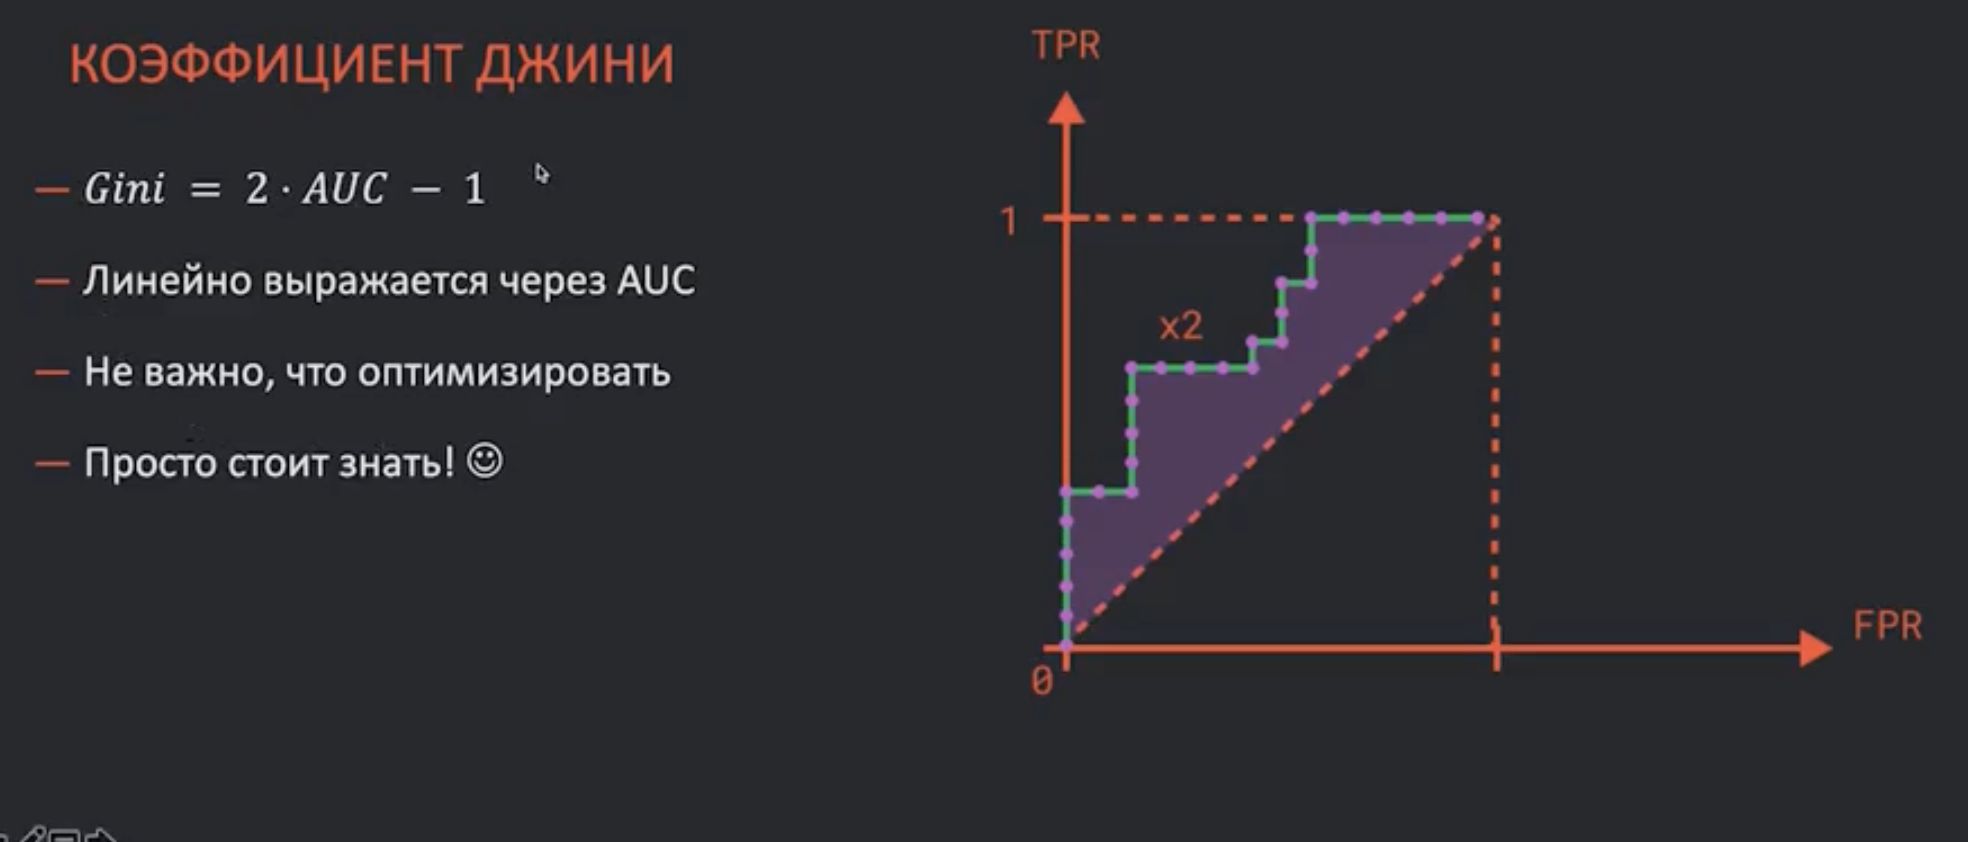

## PR - кривая

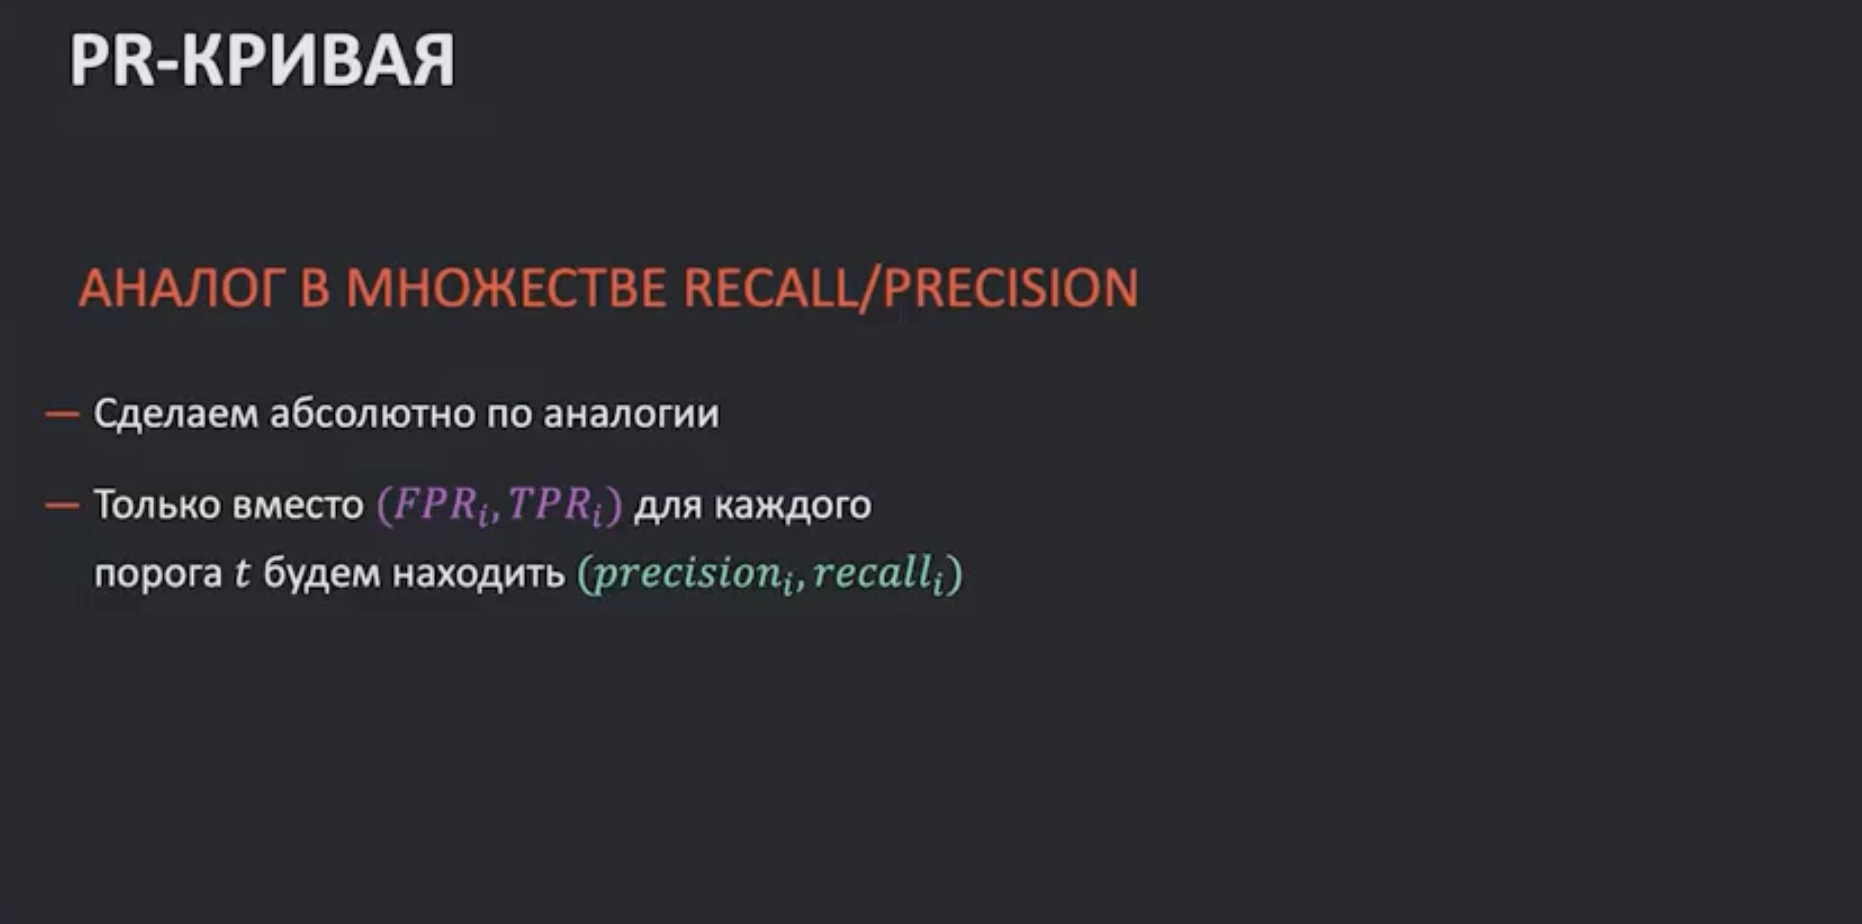

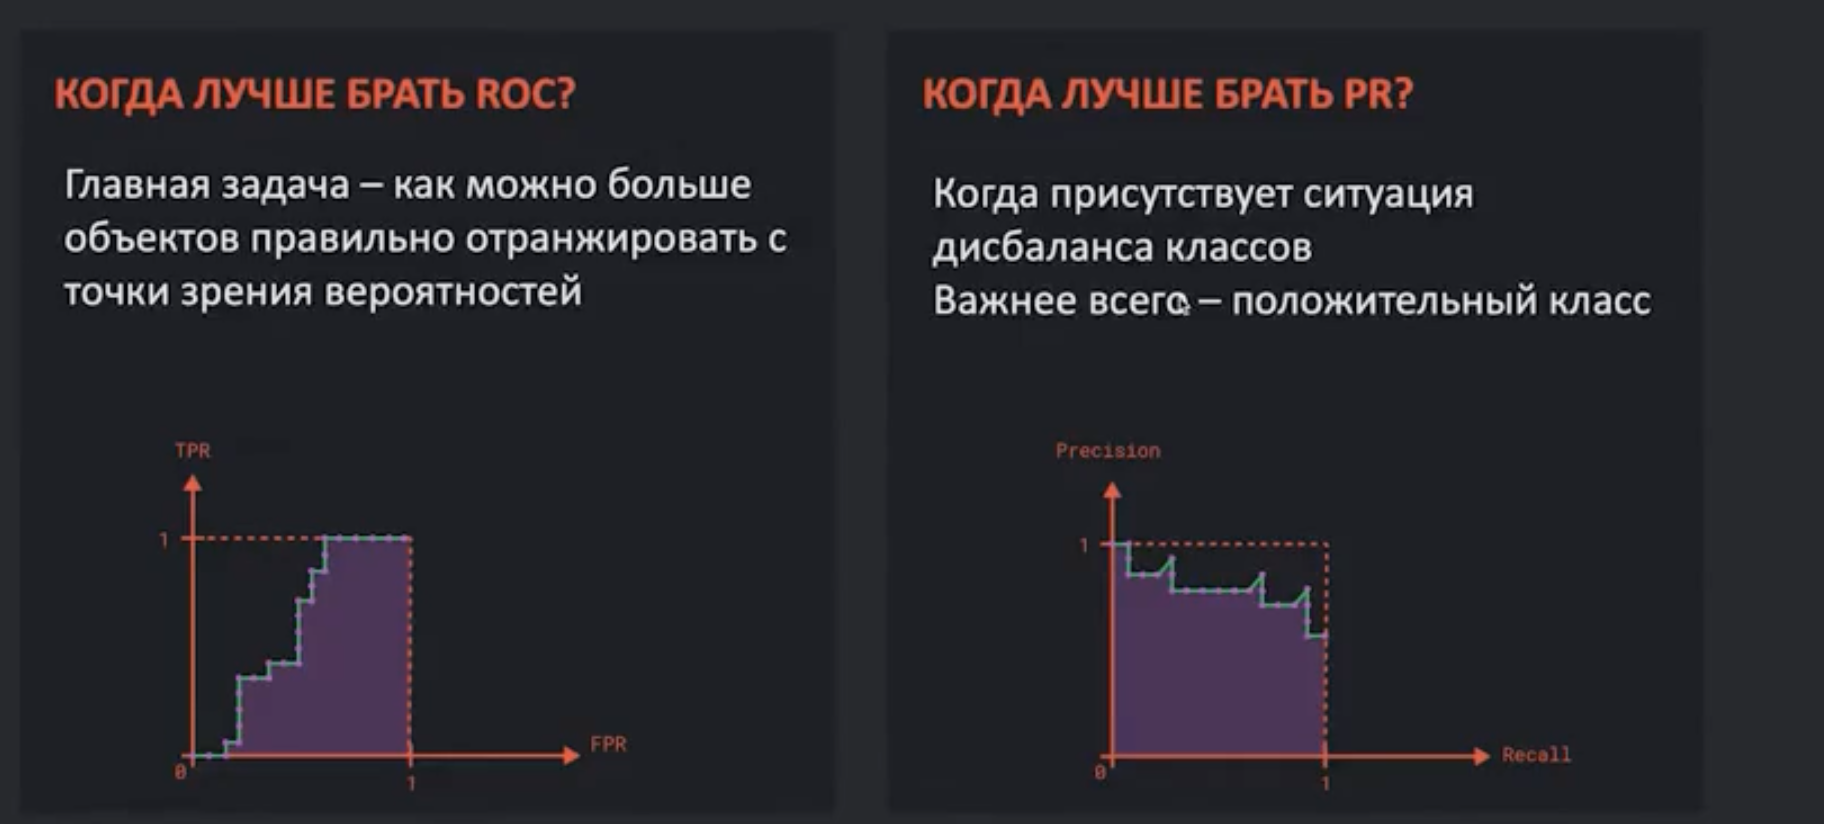


In [ ]:
### нарисуем ROC-кривую

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Y_test, pipe.predict_proba(X_test)[:, 1])

from sklearn.metrics import RocCurveDisplay

RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

# аналог

RocCurveDisplay.from_estimator(pipe, X_test, Y_test)

In [ ]:
### Посчитаем ROC-AUC

from sklearn.metrics import auc

auc(fpr, tpr)

In [ ]:
### Получим всевозможные пары Precision, Recall
### И нарисуем PR-кривую


precision, recall, thresholds = precision_recall_curve(Y_test, pipe.predict_proba(X_test)[:, 1])

from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay(precision=precision, recall=recall).plot()

# аналог

PrecisionRecallDisplay.from_estimator(pipe, X_test, Y_test)

In [ ]:
from sklearn.metrics import auc

auc(recall, precision)

## Калибровка вероятностей
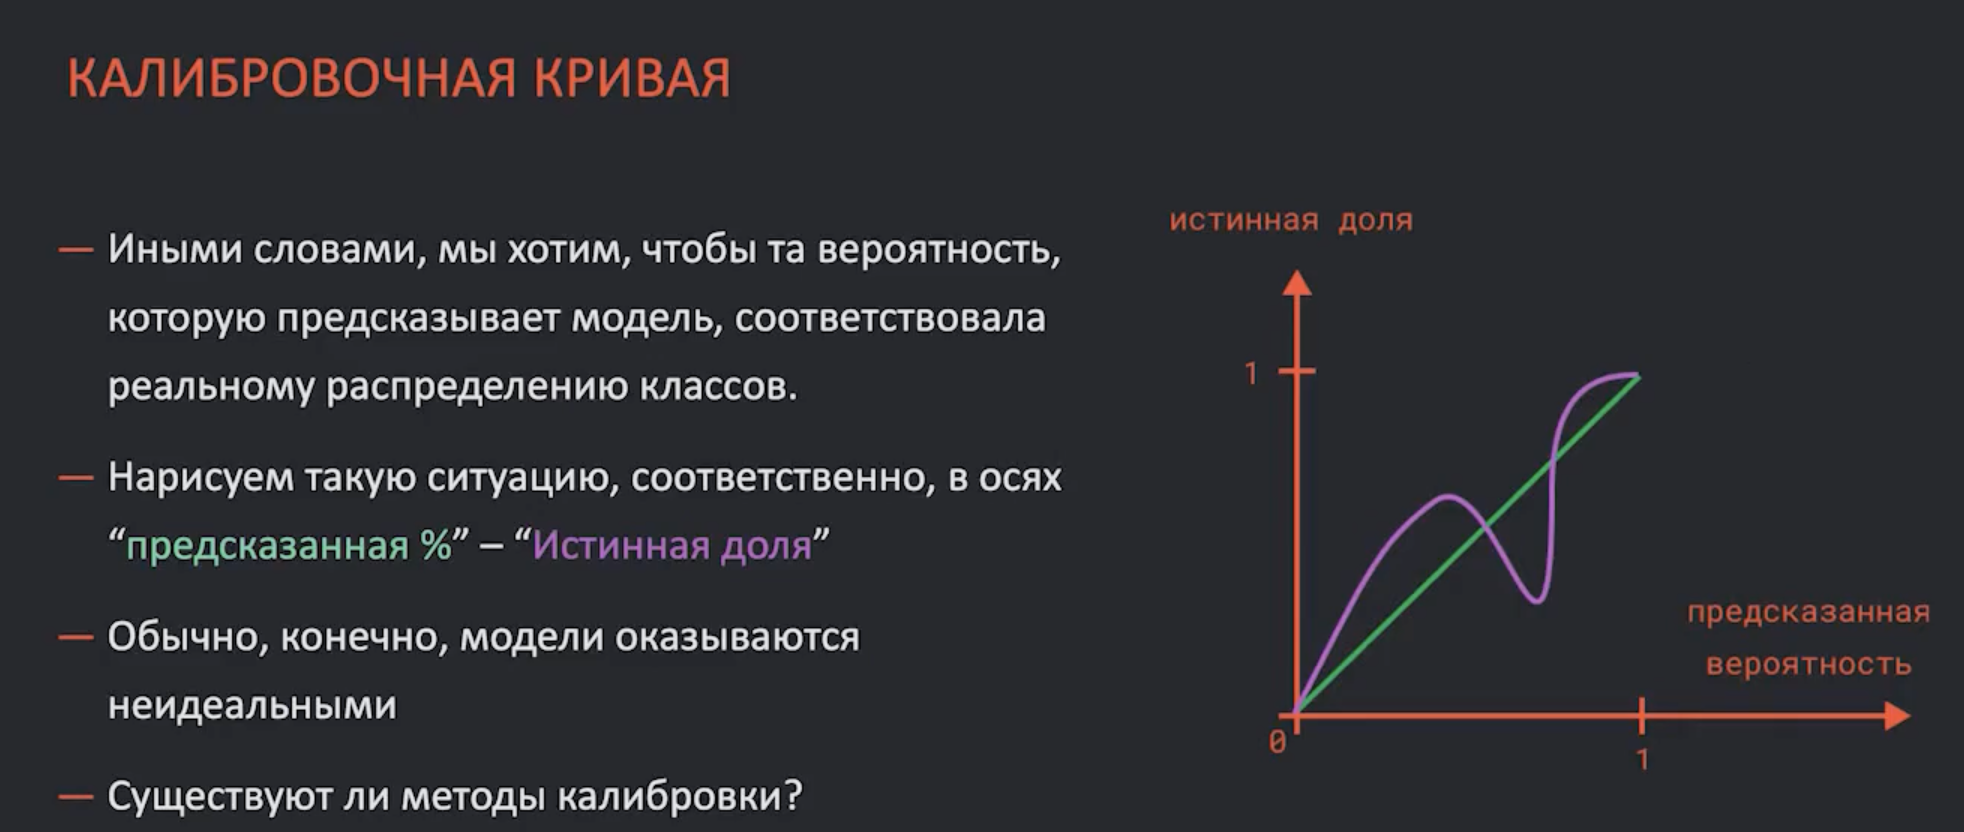
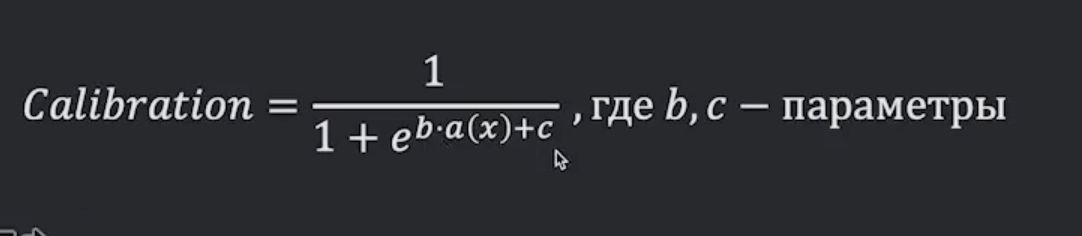

In [ ]:
from sklearn.calibration import CalibrationDisplay


CalibrationDisplay.from_estimator(pipe, X_test, Y_test)

In [ ]:
from sklearn.calibration import calibration_curve
plt.figure(figsize=(8, 5))
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

### Предсказания модели на тесте и соответствующая калибровочная кривая
prob_pos = pipe.predict_proba(X_test)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="logreg")